In [7]:
import tensorflow as tf
# print(tf.__version__)

a=tf.constant(10)
b=tf.constant(32)
sess = tf.Session()
print (sess.run(a+b))

AttributeError: module 'tensorflow' has no attribute 'Session'

In [8]:
##텐서플로우 처리 순서
import tensorflow as tf

x = tf.constant(35, name='x')
y = tf.Variable(x+5,name='y')
model =  tf.global_variables_initializer()
with tf.Session() as session:
    session.run(model)
    print(session.run(y))



AttributeError: module 'tensorflow' has no attribute 'global_variables_initializer'

In [4]:
## XOR 문제

T = 1.
F = 0.
train_in = [
    [T, T],
    [T, F],
    [F, T],
    [F, F],
]
train_out = [
    [F],
    [T],
    [T],
    [F],
]
w1 = tf.Variable(tf.random_normal([2, 2]))
b1 = tf.Variable(tf.zeros([2]))

w2 = tf.Variable(tf.random_normal([2, 1]))
b2 = tf.Variable(tf.zeros([1]))

out1 = tf.nn.relu(tf.matmul(train_in, w1) + b1)
out2 = tf.nn.relu(tf.matmul(out1, w2) + b2)

error = tf.subtract(train_out, out2)
mse = tf.reduce_mean(tf.square(error))

err = 1.0
target = 0.01
epoch = 0
max_epochs = 1000

train = tf.train.GradientDescentOptimizer(0.01).minimize(mse)

sess = tf.Session()
sess.run(tf.global_variables_initializer())

while err > target and epoch < max_epochs:
    epoch += 1
    err, _ = sess.run([mse, train])

print("epoch:", epoch, "mse:", err)
print("result: ", out1)

epoch: 1000 mse: 0.16746427
result:  Tensor("Relu_2:0", shape=(4, 2), dtype=float32)


In [9]:
##Eager Execution (기능확인)
from __future__ import absolute_import, division, print_function, unicode_literals
import tensorflow as tf
tf.enable_eager_execution() 
print(tf.executing_eagerly()) 



AttributeError: module 'tensorflow' has no attribute 'enable_eager_execution'

In [10]:
## Eager Execution (실행)
from __future__ import absolute_import, division, print_function, unicode_literals
import tensorflow as tf
tf.enable_eager_execution()


x = tf.matmul([[1,2],[3,4]],[[4,5],[6,7]])
y = tf.add(x, 1)
z = tf.random_uniform([5, 3])

print(x)
print(y)
print(z)


AttributeError: module 'tensorflow' has no attribute 'enable_eager_execution'

In [13]:
# Eager Execution (NumPy)

import numpy as np
import tensorflow as tf
# tf.enable_eager_execution() 


x = tf.add(1, 1)                     # tf.Tensor with a value of 2
y = tf.add(np.array(1), np.array(1)) # tf.Tensor with a value of 2
z = np.multiply(x, y)                # numpy.int64 with a value of 4

print(y)
print(y.numpy())


tf.Tensor(2, shape=(), dtype=int32)
2


In [14]:
#Fizzbuzz
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers

def fizzbuzz(max_num):
    counter = tf.constant(0)
    max_num = tf.convert_to_tensor(max_num)
    for num in range(1, max_num.numpy()+1):
        num = tf.constant(num)
        if int(num % 3) == 0 and int(num % 5) == 0:       print('FizzBuzz')
        elif int(num % 3) == 0:       			       print('Fizz')
        elif int(num % 5) == 0:       		 	       print('Buzz')
        else:       					       print(num.numpy())
        counter += 1

fizzbuzz(10)

1
2
Fizz
4
Buzz
Fizz
7
8
Fizz
Buzz


In [15]:
#XOR 문제 (TF 2.0)
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers

training_data = np.array([[0,0],[0,1],[1,0],[1,1]], "float32")
target_data = np.array([[0],[1],[1],[0]], "float32")

model = tf.keras.Sequential()
model.add(layers.Dense(16, input_dim=2, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss='mse',  optimizer='adam',  metrics=['binary_accuracy'])
model.fit(training_data, target_data, nb_epoch=20)


W0731 18:21:50.661628  1344 training.py:617] The `nb_epoch` argument in `fit` has been renamed `epochs`.


Train on 4 samples
Epoch 1/20
4/4 [==============================] - 0s 39ms/sample - loss: 0.2596 - binary_accuracy: 0.2500
Epoch 2/20
4/4 [==============================] - 0s 624us/sample - loss: 0.2593 - binary_accuracy: 0.2500
Epoch 3/20
4/4 [==============================] - 0s 750us/sample - loss: 0.2590 - binary_accuracy: 0.2500
Epoch 4/20
4/4 [==============================] - 0s 750us/sample - loss: 0.2587 - binary_accuracy: 0.2500
Epoch 5/20
4/4 [==============================] - 0s 624us/sample - loss: 0.2584 - binary_accuracy: 0.2500
Epoch 6/20
4/4 [==============================] - 0s 626us/sample - loss: 0.2581 - binary_accuracy: 0.2500
Epoch 7/20
4/4 [==============================] - 0s 750us/sample - loss: 0.2578 - binary_accuracy: 0.2500
Epoch 8/20
4/4 [==============================] - 0s 750us/sample - loss: 0.2575 - binary_accuracy: 0.2500
Epoch 9/20
4/4 [==============================] - 0s 750us/sample - loss: 0.2572 - binary_accuracy: 0.2500
Epoch 10/20
4/4 [==

# Tensorflow 개요
### Tensorflow
텐서플로우는 데이터 플로우 그래프를 사용하여 수치 연산을 하는 오픈소스 소프트웨어 라이브러리입니다.

CPU나 GPU를 사용하여 연산을 구동시킬수 있으며 머신러닝과 딥러닝 연구를 목적으로 구글 브레인 팀에 의해 개발되었습니다.

### Eager Excution
기존 텐서플로우 1.x 버전에서는 그래프 구조로 만들어져 연산이 되도록 구성되어 있습니다. 그래프 구조에 대해서는 실습 7-5에서 다루겠습니다.

그러나 텐서플로우 2.0에서는 파이썬의 함수처럼 바로바로 계산되어 사용할 수 있습니다. 이를 즉시 실행 (Eager Excution) 모드라고 합니다.

### 실습
작성된 코드를 보며 Tensorflow가 어떻게 구성되어 있는지 이해해보세요.

In [19]:
import tensorflow as tf

# 즉시 실행 모드가 설정되어 있다면 True를 반환해줍니다.
print(tf.executing_eagerly())

# Tensorflow 상수 선언
a = tf.constant(5, name = 'input_node1')
b = tf.constant(3, name = 'input_node2')

# Tensorflow 연산 Node
c = tf.add(a,b, name = 'add_c')
d = tf.subtract(a,b, name = 'sub_d')
e = tf.multiply(c,d, name = 'add_e')

# Tensorflow 문자열 선언
hello = tf.constant('hello Tensorflow!')

# 선언한 변수들을 출력해보면 결과값이 아닌 데이터의 타입이나 형태가 출력됩니다.
for i in [a,b,c,d,e, hello]:
    print(i)
print('--------------------')
# 실제로 데이터의 값을 출력하기 위해서 numpy()를 사용합니다.
for i in [a,b,c,d,e, hello]:
    print(i.numpy())


AttributeError: module 'tensorflow' has no attribute 'executing_eagerly'

# Tensor 데이터 생성
텐서플로우는 상수, 시퀀스, 난수, 변수 등을 생성하는 연산을 제공합니다. 기존 Numpy와 유사하게 사용할 수 있습니다.

## 상수
* tf.constant(value, dtype=None, shape=None, name='Const')

    * value : 반환되는 상수값
    * 1shape : Tesnor의 차원
    * dtype : 반환되는 Tensor 타입
    * name : 상수 이름
* tf.zeros(shape, dtype=tf.float32, name=None) : 모든 원소 값이 0인 Tensor 생성

* tf.ones(shape, dtype=tf.float32, name=None) : 모든 원소 값이 1인 Tensor 생성

* tf.fill(dims, value, name=None) : value로 채워진 Tensor 생성

    * dims : 반환되는 Tensor의 차원
    
### 시퀀스
* tf.linspace(start, stop, num, name=None)

    * start : 시작 값
    * stop : 끝 값
    * num : 생성할 데이터 개수
    * {stop - start \over num - 1} 
    * stop−start / num−1 씩 증가

* tf.range(start, limit=None, delta=1, name='range')

    * start : 시작 값
    * limit : 끝 값
    * delta : 증가량
    
### 난수
* tf.compat.v1.set_random_seed(seed) : 난수 시드 설정

* tf.random.normal(shape, mean=0.0, stddev=1.0, dtype=tf.float32, seed=None, name=None) : 정규분포로 부터 난수 생성

* tf.random.uniform(shape, minval=0, maxval=None, dtype=tf.float32, seed=None, name=None) : 균등분포로 부터 난수 생성

### 변수
기존의 Tensor와 Operation 객체는 변경할 수 없습니다. 그러므로 연산에 따라 변경되는 값을 저장할 변수가 필요합니다.

* tf.Variable(value, name) : 변수 생성

### 실습
주석을 보고 빈 부분을 알맞게 작성해보세요.

In [20]:
import numpy as np
import tensorflow as tf

print(tf.__version__)
# tf.constant로 상수를 생성해보세요.
a =tf.constant(5, dtype=None, shape=None, name='Const')

# tf.zeros, tf.one, tf.fill을 사용해 Shape을 가진 텐서를 생성해보세요.
b = tf.zeros([2,2], dtype=tf.float32, name=None)
c = tf.ones([2,3], dtype=tf.float32, name=None)
d = tf.fill([3,2], 4, name=None)

# tf.linspace, tf.range로 시퀀스 텐서를 생성해보세요.
lin = tf.linspace(0.0, 10.0, 20, name='lins')
ran = tf.range(1, 6, delta=1, name='range')

# 난수 시드 설정해보세요.
seed = tf.compat.v1.set_random_seed(123)

# 정규 분포를 가진 난수 텐서를 생성해보세요.
norm_dist = tf.random.normal([4,4], mean=0.0, stddev=1.0, dtype=tf.float32, seed=None, name=None)
# 균등 분포를 가진 난수 텐서를 생성해보세요.
uni_dist = tf.random.uniform([4,5], minval=0, maxval=None, dtype=tf.float32, seed=None, name=None)

# tf.Variable을 생성해보세요.
# 딥러닝 모델을 학습할 때 사용되는 weight와 bias는 variable로 생성합니다.
weight = tf.Variable(6, name ='weight')
bias = tf.Variable(7, name='bias')

# 각 상수, 시퀀스, 난수, 변수 출력
for i in [a, b, c, d, lin, ran, norm_dist, uni_dist, weight, bias]:
    print(i.numpy())

1.5.0


AttributeError: module 'tensorflow.python.util.compat' has no attribute 'v1'

# Tensor 데이터 타입 및 연산
### Data type
Tensorflow에서는 다양한 자료형을 사용할 수 있습니다. 이를 이용하면 어떤 데이터든지 구조화된 형식으로 저장할 수 있습니다.

    * tf.float32 : 32-bit float
    * tf.float64 : 64-bit float
    * tf.int8 : 8-bit integer
    * tf.int16 : 16-bit integer
    * tf.int32 : 32-bit integer
    * tf.uint8 : 8-bit unsigned integer
    * tf.string : String
    * tf.bool : Boolean
    
   ----------------------------
   
### 연산자
Tensorflow에도 Numpy와 유사하게 다양한 수학 연산자들을 제공합니다.

--------------------------

### 단항 연산자

    * tf.negative(x) = -x
    * tf.logical_not(x) = !x (tf.bool만 가능)
    * tf.abs(x) = x의 절대값
    
### 이항 연산자

    * tf.add() : x + y
    * tf.subtract() : x - y
    * tf.multiply() : x * y
    * tf.divide() : x / y (Python 2)
    * tf.truediv() : x / y (Python 3)
    * tf.math.floordiv() : x // y
    * tf.math.mod() : x % y
    * tf.math.pow()	: x ** y
    
### 실습
주석을 보고 알맞게 빈 부분을 채워보세요.

In [21]:
import tensorflow as tf


# 다양한 형태의 데이터 타입으로 상수를 선언해보세요.
#tf.constant(value, dtype=None, shape=None, name='Const')
a =  tf.constant(4, dtype=tf.float32, shape=None, name='f32')    # Int or float
b = tf.constant(7, dtype=tf.float32)     # Int or float
c = tf.constant(-5, dtype=tf.int32) # Negative int
string1 =tf.constant('abc', dtype=tf.string, shape=None, name='ST1')   # String
string2 = tf.constant('def', dtype=tf.string, shape=None, name='ST2')  # String
boolean = tf.constant(True, dtype=tf.bool, shape=None, name='Bool')  # Boolean

# 단항 연산자를 사용해보세요.
neg = tf.negative(a)   # Negative
logic = tf.logical_not(boolean) # Logical negative
absolute = tf.abs(c)      # Absolute

# 사칙연산을 수행해보세요.
add = tf.add(b,a)      # add
sub = tf.subtract(a,b)      # subtract
mul = tf.multiply(b,a)      # multiply
div = tf.truediv(a,b)      # divide   tf.divide() in python 2.x
                        #tf.math.floordiv()  : x // y

mod = tf.math.mod(b,a)      # Modulo
po = tf.math.pow(b,a)       # Pow

for i in [a,b,c,string1,string2,boolean,neg,logic,absolute,add,  sub, mul, div, mod, po]:
    print(i.numpy())

AttributeError: module 'tensorflow' has no attribute 'math'

# Tensorflow 선형 회귀
Tensorflow에서 어떻게 머신러닝, 딥러닝 네트워크가 학습이 되는지 전체적인 실습 코드를 통해 배워보겠습니다.

앞으로 배울 MLP, CNN, RNN 등 다양한 네트워크가 실습 코드와 같은 형식으로 작성됩니다.

코드가 눈에 익숙해지도록 전체적인 흐름을 이해해보세요.

### 선형 회귀
선형 회귀는 존재하는 데이터를 이용해 데이터의 분포를 잘 나타내는 선을 찾는 문제입니다.

* x_data = [1,2,3,4,5]
* y_data = [1,2,3,4,5]

현재 데이터를 가장 잘 나타내는 선은 y = x입니다.

데이터를 잘 나타내는 선을 찾는 과정에서 W(weight)값과 b(bias)값을 Gradient Descent 알고리즘을 이용해 찾는 과정을 보여줍니다.

자세한 이론 및 실습은 추후 강의에서 다루겠습니다. 우선 전체적인 형태를 익혀보세요.

W와 b 값이 처음에 랜덤으로 주어진 상태에서 점차 W는 1에 b는 0에 가까워지는 것을 볼 수 있습니다. (cost function의 값도 줄어드는 것을 확인할 수 있습니다.)

### 실습
랜덤하게 설정된 텐서플로우 변수 W와 b의 값이 어떻게 변하는지 확인해보세요.

train_step을 바꿔가며 W,b값을 확인해보세요. train_step이 너무 적거나 많으면 학습이 잘 진행되지 않을 수 있습니다.

learning_rate의 수치를 변경해 보세요. learning_rate의 값이 커질수록 빨리 수렴하고 작아질수록 천천히 수렴하는 것을 볼 수 있습니다.

{0.01 < learning_rate <= 0.1}

In [22]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

def Visualize(x_data, y_data, hypothesis):
    fig, ax = plt.subplots()
    ax.grid()
    ax.plot(x_data, hypothesis.numpy(), 'r-')
    ax.plot(x_data, y_data, 'o')
#     fig.savefig("plot.png")

# Hyperparameter 설정
# 학습에 필요한 파라미터를 선언합니다.
train_step = 500
learning_rate = 0.07

# 학습에 사용할 데이터를 준비합니다.
x_data = [1, 2, 3, 4, 5]
y_data = [1, 2, 3, 4, 5]

# 학습에 사용될 Weight와 Bias를 선언합니다.
# 일반적으로 랜덤 값으로 선언해 사용하며 학습 데이터와 Shape을 일치시킵니다.
W = tf.Variable((-5.0), dtype=tf.float32)
b = tf.Variable((2.0), dtype=tf.float32)


# 학습을 진행합니다.
for i in range(train_step):
    with tf.GradientTape() as tape:
        # y = W*X + b 형태의 hypothesis를 선언합니다.
        hypothesis = tf.add(W * x_data, b)
        # 에러를 최소화시키는 손실 함수 cost function을 설계합니다.
        cost = tf.reduce_mean(tf.square(hypothesis - y_data))
    
    # Gradient Descent 방법으로 Error를 최소화하고 Weight와 Bias를 업데이트 합니다.
    W_grad, b_grad = tape.gradient(cost, [W, b])
    W.assign_sub(learning_rate * W_grad)
    b.assign_sub(learning_rate * b_grad)
    
    # 30번 마다 출력
    if i % 30 == 0:
        Visualize(x_data,y_data,hypothesis)        
        print("Iter : {}| Weight : {:.4f}| Bias : {:.4f}|Cost : {:.4f}".format(i, W.numpy(), b.numpy(), cost))

# 학습된 Weight와 Bias로 검증
print((W * 5.5 + b).numpy())
print((W * 3 + b).numpy())

AttributeError: module 'tensorflow' has no attribute 'GradientTape'

# Tensorflow Session
## Tensorflow 1.x
텐서플로우 2.0이 가장 최근에 만들어졌지만 beta version이기 때문에 아직 1.x 버전을 사용하는 경우가 많습니다.

기존 텐서플로우 1.x 버전에서는 계산 그래프 구조를 가지고 있으며 각 노드별 출력 결과를 전달하는 함수들이 연속적으로 연결된 형태를 가지고 있습니다.

https://kasausyrzlhe1066469.cdn.ntruss.com/global/file/p/5d12d95a28a2efd1bb620455/tensorflow.jpeg
Tensorflow 1.x 그래프 구조

이번 실습에서는 텐서플로우2.0과 1.x의 차이를 알아보겠습니다. 실습 7-4와 같은 선형 회귀 예제를 1.x버전으로 진행해보겠습니다.

### Session
tf.Session()은 상수, 변수, 오퍼레이션을 선언하고 실질적으로 그래프를 실행하기 위한 객체입니다.

2.0 버전에서는 즉시 실행(Eager Excution)을 지원하지만 1.x 버전에서는 Session에서 모든 학습과 계산을 진행합니다.

값을 계산하고 출력하기 위해서는 Session()을 반드시 실행시켜야합니다.

-------------
* sess = tf.Session()
* sess.run(fetches, feed_dict)
    * fetches : 실행시키고자 하는 그래프 구성 요소
    * feed_dict : dictionary 객체 입력
* sess.run(tf.initializers.global_variables()) : 변수 초기화
* sess.close() : 연산이 끝났으면 Session을 닫아줍니다.
* feed_dict
* feed_dict는 그래프에서 Tensor의 값을 오버라이드 할 때 사용되며 Dictionary 객체를 받아 입력으로 사용합니다.

---------------------
입력 받는 값들은 숫자, 문자열, Numpy 배열 등 다양한 형태가 될 수 있으며 Tensor와 같은 자료형이여야 합니다.

* feed_dict = {X : data}

### Placeholder
tf.placeholder()는 생성될 때 값을 가지지는 않지만 입력될 자리를 만들어놓습니다. 간단히 말해 Input Node가 됩니다.

상수나 난수 같은 고정된 값이 아닌 사용자로부터 입력을 받아야할 때 사용됩니다. 이를 위해 tf.placeholder()를 사용합니다.

* tf.placeholder(dtype, shape, name)

### 실습
작성된 코드를 보고 따라가며 이해해보세요.

tf.placeholder()를 선언하여 입력 노드를 생성합니다.

tf.Session()을 열어 Session 내에서 연산이 수행되도록 합니다. Session을 실행하기전 변수를 초기화 해주어야합니다.

상수, 변수, 객체 등 연산을 실질적으로 수행하는 sess.run()을 사용하여 연산을 수행합니다.

feed_dict에 데이터를 입력하여 기존 선언한 데이터나 사용자가 직접 데이터를 입력할 수 있도록 되어있습니다.

2.0 버전과 1.x 버전의 차이를 기억하세요.

1.5.0
Step : 0| Weight : 0.32926| Bias : 4.21326| Cost : 5.74435
Step : 30| Weight : -0.02218| Bias : 3.69093| Cost : 2.47956
Step : 60| Weight : 0.07645| Bias : 3.33431| Cost : 2.02360
Step : 90| Weight : 0.16567| Bias : 3.01218| Cost : 1.65149
Step : 120| Weight : 0.24628| Bias : 2.72118| Cost : 1.34780
Step : 150| Weight : 0.31909| Bias : 2.45829| Cost : 1.09996
Step : 180| Weight : 0.38488| Bias : 2.22079| Cost : 0.89769
[4.198447]
[3.1404185]


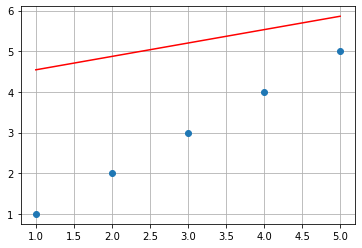

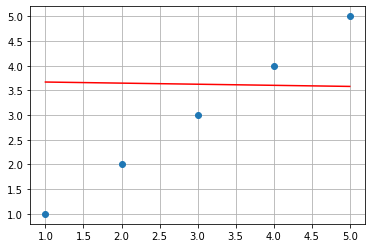

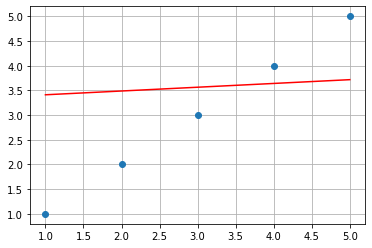

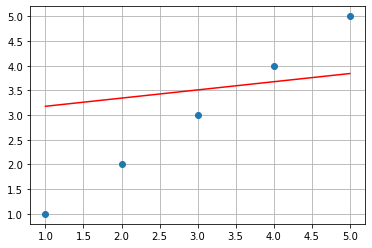

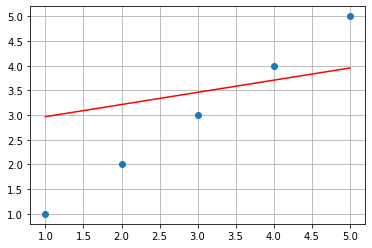

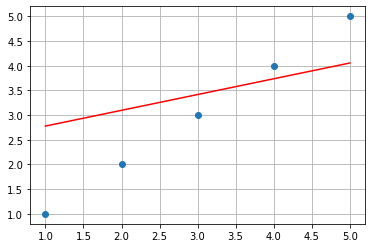

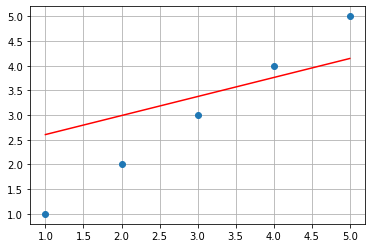

In [23]:
import tensorflow as tf
import matplotlib.pyplot as plt

# Tensorflow 1.8 Version
print(tf.__version__)

# 시각화 함수
def Visualize(x_data, y_data, hypothesis):
    fig, ax = plt.subplots()
    ax.grid()
    ax.plot(x_data, hypothesis, 'r-')
    ax.plot(x_data, y_data, 'o')
#     fig.savefig("plot.png")

# 선형 데이터 x, y 선언
x_data = [1, 2, 3, 4, 5]
y_data = [1, 2, 3, 4, 5]

# 학습에 사용할 Weight, Bias 선언
W = tf.Variable(tf.random_uniform([1], -5.0, 5.0))
b = tf.Variable(tf.random_uniform([1], -5.0, 5.0))

# 입력이 들어갈 Placeholder (Input Node) 선언
X = tf.placeholder(tf.float32)
Y = tf.placeholder(tf.float32)

# Cost 함수 설계
hypothesis = W * X + b
cost = tf.reduce_mean(tf.square(hypothesis - Y))

# 학습 속도, Cost (Loss)를 줄여나가는 방법을 정하고 Optimizer를 선언합니다.
learning_rate = 0.01
optimizer = tf.train.GradientDescentOptimizer(learning_rate)
train = optimizer.minimize(cost)

# Session을 열어줍니다.
sess = tf.Session()

# Session 내의 전체 변수를 초기화
sess.run(tf.initializers.global_variables())

# 200번 학습 진행
for i in range(200):
    # Train 객체에 학습 데이터 x_data와 Label 값 y_data를 입력합니다.
    # 입력은 feed_dict로 딕셔너리 형태의 입력이 들어갑니다.
    sess.run(train, feed_dict={X: x_data, Y: y_data})
    if i % 30 == 0:
        Visualize(x_data, y_data, sess.run(hypothesis, feed_dict = {X : x_data}))
        print("Step : {}| Weight : {:.5f}| Bias : {:.5f}| Cost : {:.5f}".format(i,float(sess.run(W)), float(sess.run(b)), float(sess.run(cost, feed_dict={X: x_data, Y: y_data}))))

# Iteration이 끝나면 학습이 끝났습니다.        
# 이제 검증 데이터로 학습된 hypothesis 성능을 평가합니다.
print(sess.run(hypothesis, feed_dict = {X : 5}))
print(sess.run(hypothesis, feed_dict = {X : 2.5}))

# 연산이 전부 끝났으면 Session을 닫아줍니다.
sess.close()

# Tensorflow + Keras
## Keras
케라스 (Keras)는 Sequential하게 계층 (Layer)들을 쌓아가며 모델을 생성하고 사이킷런과 같이 한 줄의 코드로 간단하게 학습 방법 설정, 학습, 평가를 진행할 수 있는 API입니다.

* keras.Sequential() : Sequential 모델을 만들기 위한 함수
* keras.layers() : Fully connected, Convolution 등 다양한 Layer 제공
* model.complie : 학습 방법 설정
* model.summary() : 모델 출력
* model.fit() : 모델 학습

관련 링크

https://www.tensorflow.org/beta/guide/keras/overview?hl=ko

### 실습
작성된 코드를 보고 이해해보세요.

keras.layers.Dense()의 뉴런 개수, Activation, layer 개수를 바꿔가며 결과를 분석해보세요.

model.fit()의 학습 횟수 (Epoch)를 바꿔가며 결과를 확인해보세요.

Tip 앞으로 실습에서 간단하게 딥러닝을 구현할 수 있는 Keras를 주로 다룰 예정입니다.

좀 더 심화 과정(모델 파라미터 직접 설정 및 세부 설계)을 원하신다면

https://www.tensorflow.org/beta/tutorials/quickstart/advanced?hl=ko
위의 링크를 참고하여 공부해보세요!

Instructions for updating:
keep_dims is deprecated, use keepdims instead
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 32)                64        
_________________________________________________________________
dense_2 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 33        
Total params: 1,153
Trainable params: 1,153
Non-trainable params: 0
_________________________________________________________________
Epoch 1/300
100/100 [==============================]100/100 [==============================] - 0s 5ms/step - loss: 8.8738 - mean_squared_error: 8.8738 - binary_crossentropy: 7.3927

Epoch 2/300
100/100 [==============================]100/100 [==============================] - 0s 60us/step - loss: 8.7824 - mean_squared_error: 8.78


Epoch 40/300
100/100 [==============================]100/100 [==============================] - 0s 30us/step - loss: 5.5359 - mean_squared_error: 5.5359 - binary_crossentropy: -10.1381

Epoch 41/300
100/100 [==============================]100/100 [==============================] - 0s 50us/step - loss: 5.4516 - mean_squared_error: 5.4516 - binary_crossentropy: -11.6110

Epoch 42/300
100/100 [==============================]100/100 [==============================] - 0s 50us/step - loss: 5.3668 - mean_squared_error: 5.3668 - binary_crossentropy: -11.8208

Epoch 43/300
100/100 [==============================]100/100 [==============================] - 0s 50us/step - loss: 5.2815 - mean_squared_error: 5.2815 - binary_crossentropy: -12.4437

Epoch 44/300
100/100 [==============================]100/100 [==============================] - 0s 30us/step - loss: 5.1958 - mean_squared_error: 5.1958 - binary_crossentropy: -13.1263

Epoch 45/300
100/100 [==============================]100/100 [=======


Epoch 85/300
100/100 [==============================]100/100 [==============================] - 0s 30us/step - loss: 1.7125 - mean_squared_error: 1.7125 - binary_crossentropy: -27.0395

Epoch 86/300
100/100 [==============================]100/100 [==============================] - 0s 30us/step - loss: 1.6435 - mean_squared_error: 1.6435 - binary_crossentropy: -27.0326

Epoch 87/300
100/100 [==============================]100/100 [==============================] - 0s 50us/step - loss: 1.5766 - mean_squared_error: 1.5766 - binary_crossentropy: -27.0227

Epoch 88/300
100/100 [==============================]100/100 [==============================] - 0s 40us/step - loss: 1.5114 - mean_squared_error: 1.5114 - binary_crossentropy: -26.9760

Epoch 89/300
100/100 [==============================]100/100 [==============================] - 0s 30us/step - loss: 1.4478 - mean_squared_error: 1.4478 - binary_crossentropy: -26.9276

Epoch 90/300
100/100 [==============================]100/100 [=======


Epoch 129/300
100/100 [==============================]100/100 [==============================] - 0s 30us/step - loss: 0.3585 - mean_squared_error: 0.3585 - binary_crossentropy: -26.4175

Epoch 130/300
100/100 [==============================]100/100 [==============================] - 0s 30us/step - loss: 0.3555 - mean_squared_error: 0.3555 - binary_crossentropy: -26.4175

Epoch 131/300
100/100 [==============================]100/100 [==============================] - 0s 30us/step - loss: 0.3528 - mean_squared_error: 0.3528 - binary_crossentropy: -26.4175

Epoch 132/300
100/100 [==============================]100/100 [==============================] - 0s 40us/step - loss: 0.3504 - mean_squared_error: 0.3504 - binary_crossentropy: -26.4175

Epoch 133/300
100/100 [==============================]100/100 [==============================] - 0s 60us/step - loss: 0.3482 - mean_squared_error: 0.3482 - binary_crossentropy: -26.4175

Epoch 134/300
100/100 [==============================]100/100 [=


Epoch 173/300
100/100 [==============================]100/100 [==============================] - 0s 30us/step - loss: 0.2846 - mean_squared_error: 0.2846 - binary_crossentropy: -26.4175

Epoch 174/300
100/100 [==============================]100/100 [==============================] - 0s 40us/step - loss: 0.2830 - mean_squared_error: 0.2830 - binary_crossentropy: -26.4175

Epoch 175/300
100/100 [==============================]100/100 [==============================] - 0s 40us/step - loss: 0.2814 - mean_squared_error: 0.2814 - binary_crossentropy: -26.4175

Epoch 176/300
100/100 [==============================]100/100 [==============================] - 0s 30us/step - loss: 0.2798 - mean_squared_error: 0.2798 - binary_crossentropy: -26.4175

Epoch 177/300
100/100 [==============================]100/100 [==============================] - 0s 30us/step - loss: 0.2782 - mean_squared_error: 0.2782 - binary_crossentropy: -26.4175

Epoch 178/300
100/100 [==============================]100/100 [=


Epoch 217/300
100/100 [==============================]100/100 [==============================] - 0s 30us/step - loss: 0.2150 - mean_squared_error: 0.2150 - binary_crossentropy: -26.4175

Epoch 218/300
100/100 [==============================]100/100 [==============================] - 0s 30us/step - loss: 0.2135 - mean_squared_error: 0.2135 - binary_crossentropy: -26.4175

Epoch 219/300
100/100 [==============================]100/100 [==============================] - 0s 80us/step - loss: 0.2120 - mean_squared_error: 0.2120 - binary_crossentropy: -26.4175

Epoch 220/300
100/100 [==============================]100/100 [==============================] - 0s 40us/step - loss: 0.2104 - mean_squared_error: 0.2104 - binary_crossentropy: -26.4175

Epoch 221/300
100/100 [==============================]100/100 [==============================] - 0s 40us/step - loss: 0.2089 - mean_squared_error: 0.2089 - binary_crossentropy: -26.4175

Epoch 222/300
100/100 [==============================]100/100 [=


Epoch 261/300
100/100 [==============================]100/100 [==============================] - 0s 80us/step - loss: 0.1517 - mean_squared_error: 0.1517 - binary_crossentropy: -26.4175

Epoch 262/300
100/100 [==============================]100/100 [==============================] - 0s 40us/step - loss: 0.1504 - mean_squared_error: 0.1504 - binary_crossentropy: -26.4175

Epoch 263/300
100/100 [==============================]100/100 [==============================] - 0s 30us/step - loss: 0.1490 - mean_squared_error: 0.1490 - binary_crossentropy: -26.4175

Epoch 264/300
100/100 [==============================]100/100 [==============================] - 0s 40us/step - loss: 0.1477 - mean_squared_error: 0.1477 - binary_crossentropy: -26.4175

Epoch 265/300
100/100 [==============================]100/100 [==============================] - 0s 40us/step - loss: 0.1464 - mean_squared_error: 0.1464 - binary_crossentropy: -26.4175

Epoch 266/300
100/100 [==============================]100/100 [=

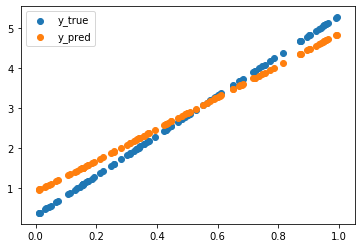

In [24]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras

# 임의의 데이터 x, y를 선언합니다.
x = np.random.rand(100,1)
y = 5 * x + 3 * np.random.rand(1)

# Keras는 Sequential하게 모델을 선언합니다.
# Sequential.add 방법으로 모델을 만들 수도 있고
# 아래와 같이 Sequential의 내부 인자로 Layer를 쌓을 수도 있습니다.
model = keras.Sequential([
    # `.summary` 메서드 때문에 `input_shape`가 필요합니다
    # 첫 번째 Layer에 데이터를 넣을때는 input_shape을 맞춰줘야합니다.
    keras.layers.Dense(32, activation=tf.nn.relu, input_shape = (1, )),
    keras.layers.Dense(32, activation=tf.nn.relu),
    keras.layers.Dense(1)
])

# 모델을 학습시킬 최적화 방법, loss 계산 방법, 평가 방법을 설정합니다.
model.compile(optimizer='adam',loss='mse',metrics=['mse', 'binary_crossentropy'])
# 모델이 어떻게 이루어져있는지 출력합니다.
model.summary()
# 모델을 학습시킵니다
history = model.fit(x,y, epochs = 300, batch_size = 100 )

# 결과 출력
plt.scatter(x, y, label='y_true')
plt.scatter(x, model.predict(x), label='y_pred')
plt.legend()
# plt.savefig("plot.png")


# Tensorflow 계산기
Tensorflow를 이용해 간단한 실수 사칙연산 계산기를 만들어보세요.

사용되는 모든 기능은 tensorflow 내장 함수를 사용해주세요.

### 미션
* tf.add()
* tf.subtract()
* tf.multiply()
* tf.truediv()

insert()함수로 두 실수 x, y와 어떤 연산을 할것인지 정하는 cal(+, -, *, /)을 입력하세요.

calcul() 을 완성시켜보세요.

모든 기능을 tensorflow 내장 함수로 구현해주세요.

In [25]:
import tensorflow as tf
import numpy as np

# Main()에서 insert 함수를 호출해서 정수 또는 실수를 입력받으세요.
# 제출할 때는 insert 함수를 주석처리하고 제출하세요.
def insert():
    x = float(input('정수 또는 실수를 입력하세요. x : '))
    y = float(input('정수 또는 실수를 입력하세요. y : '))
    cal = input('어떤 연산을 할것인지 입력하세요. (+, -, *, /)')
    return x, y, cal

# 사칙연산 함수를 구현해보세요.

def calcul(x,y,cal):
    result = 0
    # 더하기
    if cal == '+':
        result = tf.add(x,y)        #tf.Variable((x+y),name='result').numpy()
    # 빼기
    elif cal == '-':
        result =tf.subtract(x,y)        #tf.Variable((x-y),name='result').numpy()
    # 곱하기
    elif cal == '*':
        result = tf.multiply(x,y)               #tf.Variable((x*y),name='result').numpy()
    # 나누기
    elif cal == '/':
        result =tf.truediv(x,y)                   #tf.Variable((x/y),name='result').numpy()
    return result.numpy()

# 제출할 땐 insert를 주석 처리 (#) 하고 제출해주세요.
x, y, cal = insert()

# calcul 함수를 호출해 실수 사칙연산을 수행하고 결과를 출력해보세요.
# 제출할 땐 print를 주석 처리 (#) 하고 제출해주세요.
print(calcul(x,y,cal))
    

정수 또는 실수를 입력하세요. x : 5
정수 또는 실수를 입력하세요. y : 6
어떤 연산을 할것인지 입력하세요. (+, -, *, /)+


AttributeError: 'Tensor' object has no attribute 'numpy'

# Tensorflow Linear Regression
앞서 실습에서 진행한 선형 회귀를 직접 구현해보겠습니다.

주어진 x_data,y_data 에 대해 hypothesis를 만들고 W와 b를 업데이트 해보세요.

### 미션
학습에 필요한 파라미터를 선언해주세요.

* train_step, learning_rate

hypothesis를 만들어보세요.

cost에 손실 함수를 설계해보세요.

Line 44, 45 에서 W와 b를 업데이트해주세요.

W, b의 오차 범위가 -0.3 ~ +0.3 가 되도록 학습시켜 보세요.

In [15]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

def Visualize(x_data, y_data, hypothesis):
    fig, ax = plt.subplots()
    ax.grid()
    ax.plot(x_data, hypothesis.numpy(), 'r-')
    ax.plot(x_data, y_data, 'o')
#     fig.savefig("plot.png")

# Hyperparameter 설정
## TODO 1:학습에 필요한 파라미터를 선언합니다.
train_step = 300
learning_rate = 0.01

# 학습에 사용할 데이터입니다.
seed = tf.compat.v1.set_random_seed(40)
x_data = 2 * tf.random.normal([100,1], dtype=tf.float32, seed=seed)
y_data = 3 * x_data + 2 * tf.random.normal([100,1], dtype=tf.float32, seed=seed)

# 학습에 사용될 Weight와 Bias를 선언합니다.
# 일반적으로 랜덤 값으로 선언해 사용하며 학습 데이터와 Shape을 일치시킵니다.
W = tf.Variable((-5.0), dtype=tf.float32)
b = tf.Variable((2.0), dtype=tf.float32)

# 학습을 진행합니다.
for i in range(train_step):
    with tf.GradientTape() as tape:
        # y = W*X + b 형태의 hypothesis를 선언합니다.
        ## TODO 2: hypothesis를 만들어주세요.
        hypothesis = tf.add(W * x_data, b)
        # 에러를 최소화시키는 손실 함수 cost function을 설계합니다.
        ## TODO 3: Cost Function을 설계해주세요. Hint : MSE
        cost = tf.reduce_mean(tf.square(hypothesis - y_data))
    
    # Gradient Descent 방법으로 Error를 최소화하고 Weight와 Bias를 업데이트 합니다.
    W_grad, b_grad = tape.gradient(cost, [W, b])
    
    # TODO 4: Weight와 Bias를 업데이트 해주세요. Hint : Learning_rate * Update Value
    W.assign_sub(learning_rate *W_grad)
    b.assign_sub(learning_rate *b_grad)
    
    # 30번 마다 출력
    if i % 30 == 0:
        Visualize(x_data,y_data,hypothesis)        
        print("Iter : {}| Weight : {:.4f}| Bias : {:.4f}|Cost : {:.4f}".format(i, W.numpy(), b.numpy(), cost))


AttributeError: module 'tensorflow.python.util.compat' has no attribute 'v1'